### Problem Statement

*Predicting housing prices is of interest to potential buyers, sellers, and organizations alike. Multiple online platforms offer, for example, a free “price estimate” based on underlying machine learning models. For this assignment, we are going to build the best machine learning model we can for Ames, Iowa. The data set consists of 79 features that describe the quality and quantity of the properties to base our predictions on.*

# Task 0: Data Preperation

*Note: No code has to be written for the 5 cells below - you may just execute them sequentially. After this, you may move on to **Task 1** on understanding the data.*

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from scipy.stats import pearsonr

In [4]:
# All missing data removed/cleaned
housing_df = pd.read_csv("ames_data_no_missing.csv", index_col=0)
housing_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,None,Reg,Lvl,Corner,Gtl,...,0,None,None,None,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,189900


In [5]:
#Check the number of dummies to be created
count = [housing_df[col].nunique() for col in housing_df.columns if housing_df[col].dtype==object]
sum(count)

279

In [6]:
# ensure Python reads the categorical variables as categorical
for column in housing_df.columns:
    if housing_df[column].dtype == 'object':
        housing_df[column] = pd.Categorical(housing_df[column])

In [7]:
#define our RMSE function
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

# Task 1: Understand the Data
*Take some time to familiarize yourself with the data. It contains information about housing prices in Ames. What are the key variables?*

*You may perform any additional EDA if necessary.*

### 1.1
*What is the distribution of housing prices?*

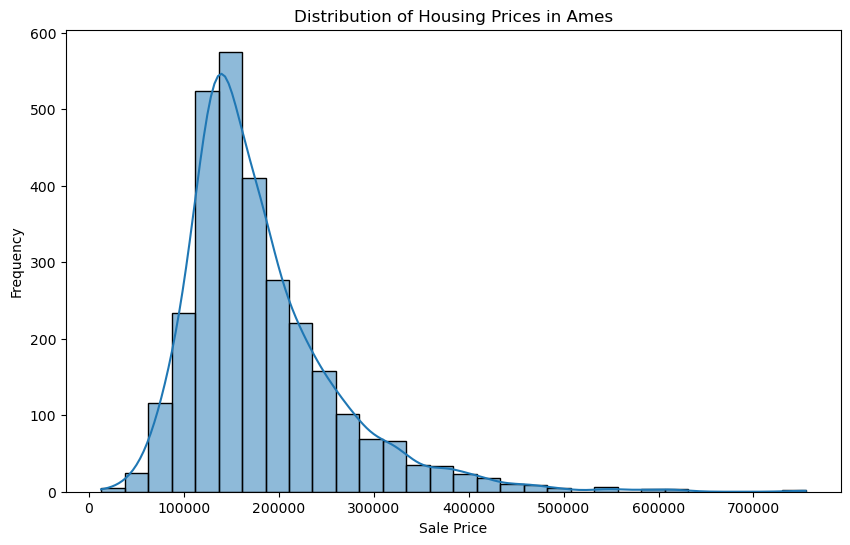

In [8]:
# Plot the distribution of housing prices
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Housing Prices in Ames')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


### 1.2
*What is the variable that has the highest correlation with Housing prices? What are the key drivers behind larger house prices?*

C:\Users\vimal.gondaliya\AppData\Local\Temp\ipykernel_4868\1737455396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_df.corr()


The variable with the highest correlation with SalePrice is: Overall Qual


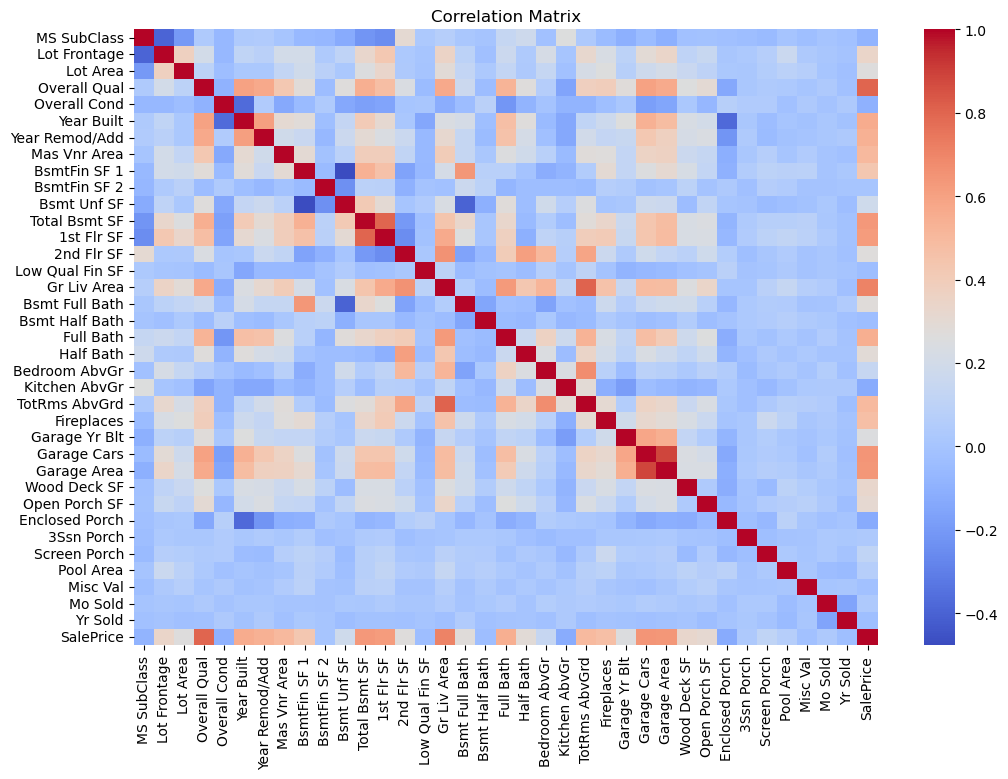

In [9]:
# Calculate the correlation matrix
correlation_matrix = housing_df.corr()

# Extract the correlation of each feature with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

# Print the variable with the highest correlation with SalePrice
highest_correlation_variable = correlation_with_saleprice.index[1]  # Index 0 is 'SalePrice' itself
print(f"The variable with the highest correlation with SalePrice is: {highest_correlation_variable}")

# Plot a heatmap of the correlation matrix for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


### 1.3
*Create one additional visualization, that gives some insights into the data.*

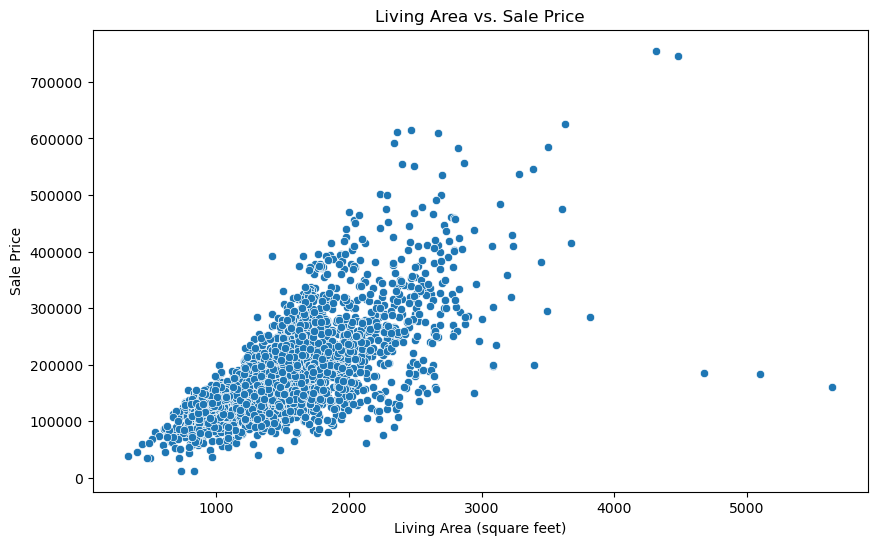

In [10]:
# Scatter plot of living area vs. sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=housing_df)
plt.title('Living Area vs. Sale Price')
plt.xlabel('Living Area (square feet)')
plt.ylabel('Sale Price')
plt.show()


# Task 2: Build machine learning models

*Use your knowledge of prediction models to create at least three models that predict housing prices.*

### 2.1 
1. *Create dummies for all the categorical columns*.

2. *Partition your data into training and validation (70-30 split, setting the random state to 1).*
3. *Scale the train and the test set using StandardScaler()*

In [11]:
# Initialize X and y
X = housing_df.drop(columns=['SalePrice']) # All but the outcome column
y = housing_df['SalePrice']

In [12]:
# Use dummy variables for categorical variables

# Use dummy variables for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Partition the data into training and validation sets (70-30 split)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the training set and the validation set using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)



In [13]:
# Train - Test split (70-30 split, setting the random state to 1)

from sklearn.model_selection import train_test_split

# Set the random state for reproducibility
random_state = 1

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)


In [14]:
# Scale the train and test set features separately
scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']

from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_cols = [col for col in X.columns if X[col].dtype != 'category']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform the test set using the scaler fitted on the training set
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])



### 2.2
*Build a linear regression model, a regression tree and a kNN model. Carefully apply regularization for the linear regression model. Carefully select which variables to use for the kNN model.*

In [15]:
# Linear model - USE LassoCV to get the best LASSO model

from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Linear model - Lasso Regression with cross-validated alpha selection
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train_scaled, y_train)

# Regression Tree model
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train_scaled, y_train)

# k-NN model - Selecting top features for k-NN
# Let's use the top 20 most correlated features with the target variable 'SalePrice'
top_features = abs(X_train_scaled.corrwith(y_train)).sort_values(ascending=False).head(20).index
X_train_knn = X_train_scaled[top_features]
X_test_knn = X_test_scaled[top_features]

# Initialize k-NN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_knn, y_train)



KNeighborsRegressor()

In [24]:
# Tree Model - Use max depth to control the complexity of the tree. Run a Grid search for multiple values of max depth.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_tree_model = grid_search.best_estimator_



Best Parameters: {'max_depth': None}


In [25]:
# KNN Model
from sklearn.neighbors import KNeighborsRegressor

# Select the top 20 most correlated features
top_20_features = correlation_matrix['SalePrice'].sort_values(ascending=False).index[1:21]

# Build the k-NN model
knn_model = KNeighborsRegressor()

# Use only the top 20 features for training
X_train_top20 = X_train_scaled[top_20_features]
X_test_top20 = X_test_scaled[top_20_features]

# Define the parameter grid for k
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9]}

# Initialize GridSearchCV for k-NN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_knn.fit(X_train_top20, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
print("Best Parameters for k-NN:", best_params_knn)

# Get the best k-NN model
best_knn_model = grid_search_knn.best_estimator_


Best Parameters for k-NN: {'n_neighbors': 9}


### 2.3
*Summarize the predictive performance in terms of RMSE.* 
1. *Calculate the RMSE values for train and validation for all the models*
2. *Display them in a tabulated format*

Hint: You may use the code that you've learnt in the 'Model selection' module

In [31]:
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming X_train_scaled, X_valid_scaled, y_train, y_valid are your training and validation sets

# Linear Regression
lasso_model = LassoCV()
lasso_model.fit(X_train_scaled, y_train)
y_train_pred_lr = lasso_model.predict(X_train_scaled)
y_valid_pred_lr = lasso_model.predict(X_valid_scaled)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_valid_lr = np.sqrt(mean_squared_error(y_valid, y_valid_pred_lr))

# Decision Tree
tree_model = DecisionTreeRegressor(max_depth=10)  # Replace 10 with your chosen max depth
tree_model.fit(X_train_scaled, y_train)
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_valid_pred_tree = tree_model.predict(X_valid_scaled)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_valid_tree = np.sqrt(mean_squared_error(y_valid, y_valid_pred_tree))

# k-NN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_valid_pred_knn = knn_model.predict(X_valid_scaled)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_valid_knn = np.sqrt(mean_squared_error(y_valid, y_valid_pred_knn))

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'k-NN'],
    'RMSE (Train)': [rmse_train_lr, rmse_train_tree, rmse_train_knn],
    'RMSE (Validation)': [rmse_valid_lr, rmse_valid_tree, rmse_valid_knn]
})

# Display the results
print(results_df)


C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


               Model  RMSE (Train)  RMSE (Validation)
0  Linear Regression  25526.002723       28174.843482
1      Decision Tree  10370.862557       34847.749544
2               k-NN  31981.385305       37233.441220


### 2.4
*Study the largest errors that you made (largest overpredictions, largest underpredictions). What may be some of the reasons why the model is over/under predicting? Do these insights possibly help you improve the models?*

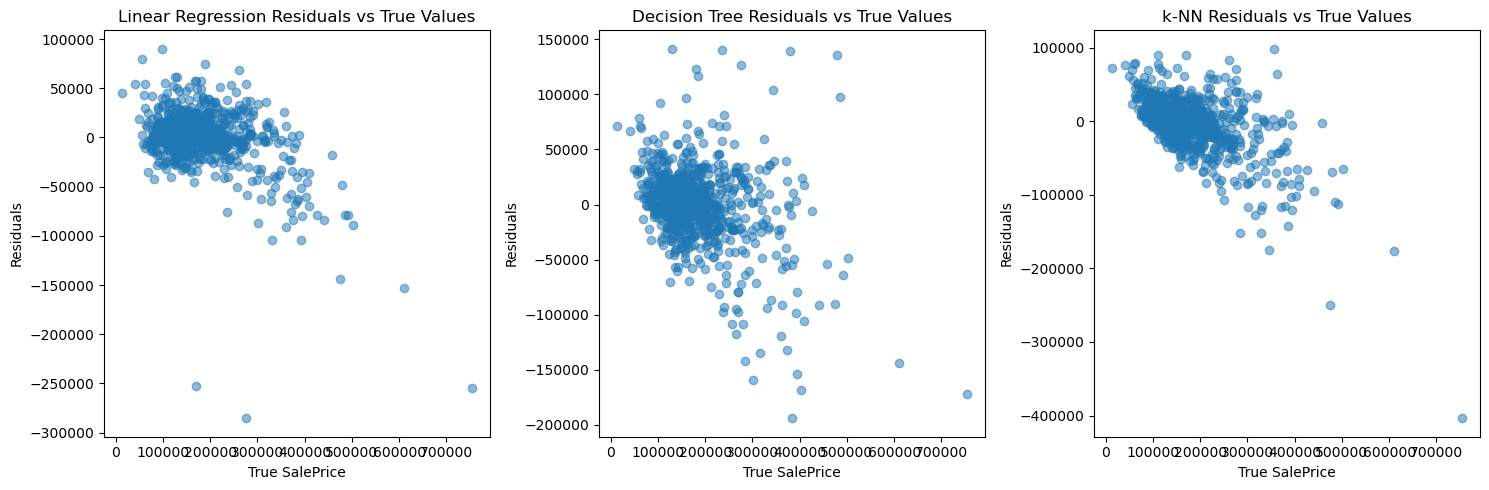

In [32]:
# Visualize the errors - plot a scatterplot of the residuals vs the true SalePrice

import matplotlib.pyplot as plt

# Calculate residuals for each model
residuals_lr = y_valid_pred_lr - y_valid
residuals_tree = y_valid_pred_tree - y_valid
residuals_knn = y_valid_pred_knn - y_valid

# Find indices of largest errors for each model
largest_errors_lr = residuals_lr.abs().nlargest(5).index
largest_errors_tree = residuals_tree.abs().nlargest(5).index
largest_errors_knn = residuals_knn.abs().nlargest(5).index

# Visualize the errors using a scatter plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_valid, residuals_lr, alpha=0.5)
plt.title('Linear Regression Residuals vs True Values')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
plt.scatter(y_valid, residuals_tree, alpha=0.5)
plt.title('Decision Tree Residuals vs True Values')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
plt.scatter(y_valid, residuals_knn, alpha=0.5)
plt.title('k-NN Residuals vs True Values')
plt.xlabel('True SalePrice')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Task 3

### 3.1
*Are you able to improve your linear regression model by taking the log of the dependent variable? (remember to translate your predicted outcome back to the original units before calculating the RMSE)*

*Create a visualization, that highlights the distribution of prices when after taking log of the dependent variable*

Hint - You may use [numpy.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to get the log of the dependent variable

C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


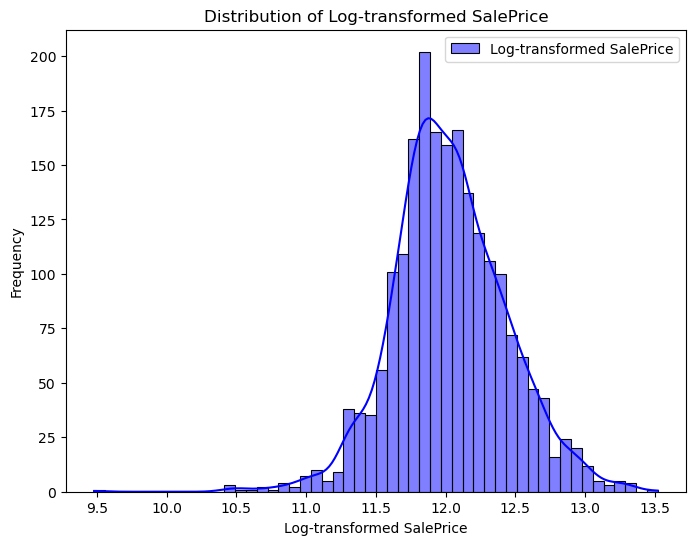

RMSE on the log-transformed scale: 88652260.38


In [35]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Log-transform the dependent variable
y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

# Train linear regression model with log-transformed target
lr_model_log = LinearRegression()
lr_model_log.fit(X_train_scaled, y_train_log)

# Predict on the validation set
y_valid_pred_log = lr_model_log.predict(X_valid_scaled)

# Calculate RMSE on the log-transformed scale
rmse_valid_log = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_log))

# Visualize the distribution of the log-transformed SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(y_train_log, kde=True, color='blue', label='Log-transformed SalePrice')
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('Log-transformed SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display RMSE on the log-transformed scale
print(f"RMSE on the log-transformed scale: {rmse_valid_log:.2f}")


In [36]:
# Linear model - Using the log of the SalePrice as the dependent variable, run the LassoCV to obtain the best LASSO model
# Note that the optimum value of Alpha for this model would also be scaled down to a log scale. It's a better idea to simply search for the best alpha once again using LassoCV.


from sklearn.linear_model import LassoCV

# Create LassoCV model
lasso_cv_model = LassoCV(cv=5, random_state=42)

# Fit the model on the log-transformed training data
lasso_cv_model.fit(X_train_scaled, y_train_log)

# Display the best alpha value
best_alpha = lasso_cv_model.alpha_
print(f"Best alpha for LASSO: {best_alpha}")

# Display the coefficients of the LASSO model
lasso_coefficients = pd.Series(lasso_cv_model.coef_, index=X_train_scaled.columns)
print("LASSO coefficients:")
print(lasso_coefficients[lasso_coefficients != 0])

# Predict on the log-transformed validation set
y_valid_pred_lasso = lasso_cv_model.predict(X_valid_scaled)

# Calculate RMSE on the log-transformed scale
rmse_valid_lasso = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred_lasso))
print(f"RMSE on the log-transformed scale (LASSO): {rmse_valid_lasso:.2f}")


Best alpha for LASSO: 0.003642538129704526
LASSO coefficients:
MS SubClass              -0.013385
Lot Area                  0.009981
Overall Qual              0.099058
Overall Cond              0.036177
Year Built                0.048630
                            ...   
Sale Type_ConLD          -0.000679
Sale Type_New             0.018843
Sale Condition_AdjLand    0.003543
Sale Condition_Family    -0.002906
Sale Condition_Normal     0.018051
Length: 112, dtype: float64
RMSE on the log-transformed scale (LASSO): 0.14


C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [39]:
# Assuming you have the original target variable for the test set as y_test
# Perform log transformation
y_test_log = np.log1p(y_test)

# Predict on the log-transformed test set
y_test_pred_lasso = lasso_cv_model.predict(X_test_scaled)

# Calculate RMSE on the log-transformed scale for test set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test_log, y_test_pred_lasso))
print(f"RMSE on the log-transformed scale for test set (LASSO): {rmse_test_lasso:.2f}")


RMSE on the log-transformed scale for test set (LASSO): 0.14


In [45]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Obtain predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Now calculate RMSE
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))


### 3.2 Bonus Task
*Experiment with data segmentation: Should you subset the data and fit separate models for each subset?*

Data segmentation is generally useful when we think that subsegments of our data have substantially different relationships between their features and the outcome compared to other subsegments (i.e variable interactions). We can use a combination of prior knowledge and data exploration to build our domain knowledge about where this situation would apply.

Starting with prior knowledge, you can hypothesize $HouseStyle$ may be a candidate for data segmentation, as for instance, 3 bedrooms in a 1-story house may have a different effect on $SalePrice$ than 3 bedrooms in a 2-story house.

In [46]:
housing_df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [47]:
housing_df['Bedroom AbvGr'].value_counts()

3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: Bedroom AbvGr, dtype: int64

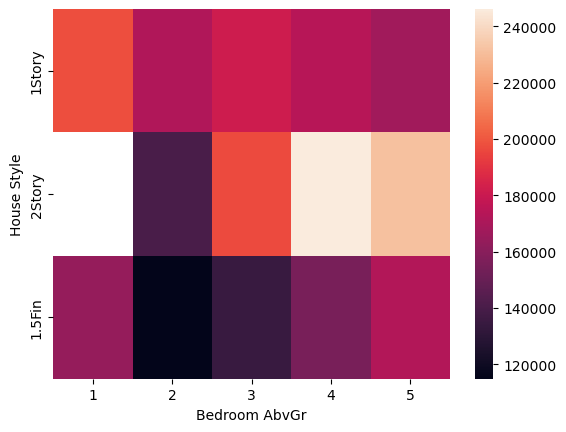

In [48]:
matrix = []
styles = ['1Story', '2Story', '1.5Fin']
for style in styles:
    curr_style = []
    for bedrooms in range(1, 6):
        curr_mean = housing_df[(housing_df['House Style'] == style) & 
                               (housing_df['Bedroom AbvGr'] == bedrooms)]['SalePrice'].mean()
        
        curr_style.append(curr_mean)
    matrix.append(curr_style)
sns.heatmap(matrix)
plt.ylabel('House Style')
plt.yticks(np.arange(3)+0.5, styles)
plt.xlabel('Bedroom AbvGr')
plt.xticks(np.arange(5)+0.5, np.arange(5)+1)
pass


We indeed see some interaction between the housing style and bedroom number, indicating data segmentation could be promising. 

*From here, it's your task to start building a linear model to see whether data segmentation will improve results.*

Hint: For the first two subtasks in 3.2, you could run a for-loop for each style in HouseStyles and evaluate/create the LASSO model.

In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


styles = ['1Story', '2Story', '1.5Fin']

# Create dummy columns for each House Style
for style in styles:
    df['HouseStyle_' + style] = (df['House Style'] == style).astype(int)

# Features (X) and target variable (y)
X = df.drop(['SalePrice'], axis=1)  # Adjust if needed
y = df['SalePrice']

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Append the Lasso model to the preprocessor in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('lasso', LassoCV(alphas=np.logspace(-4, 4, 100), cv=5))])

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, np.log(y_train))

# Make predictions on the validation set
y_valid_pred = np.exp(model.predict(X_valid))

# Calculate RMSE for the validation set
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print(f"RMSE on the log-transformed scale for validation set: {rmse:.2f}")


RMSE on the log-transformed scale for validation set: 33768.12


In [61]:
# Print the column names to identify the available columns
print(df.columns)


Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
   

In [65]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

styles = ['1Story', '2Story', '1.5Fin']

# Create a DataFrame to store RMSE values
rmse_df = pd.DataFrame(columns=['Subset', 'Model', 'Train RMSE', 'Validation RMSE'])

# Iterate through each subset
for style in styles:
    # Subset the data for the specific HouseStyle
    subset_train = df[df['House Style'] == style]
    subset_valid = df[df['House Style'] == style]

    # Features (X) and target variable (y)
    X_train = subset_train.drop(['SalePrice'], axis=1)
    y_train = subset_train['SalePrice']
    X_valid = subset_valid.drop(['SalePrice'], axis=1)
    y_valid = subset_valid['SalePrice']

    # Separate numeric and categorical columns
    numeric_cols = X_train.select_dtypes(include=['number']).columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns

    # Create transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Append the Lasso model to the preprocessor in a pipeline
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lasso', LassoCV(alphas=np.logspace(-4, 4, 100), cv=5))])

    # Fit the model
    model.fit(X_train, np.log(y_train))

    # Make predictions on the train set
    y_train_pred = np.exp(model.predict(X_train))

    # Make predictions on the validation set
    y_valid_pred = np.exp(model.predict(X_valid))

    # Calculate RMSE for train and validation sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    # Append the results to the DataFrame
    rmse_df = rmse_df.append({'Subset': style, 'Model': 'Linear Data Segmentation Model', 'Train RMSE': train_rmse, 'Validation RMSE': valid_rmse}, ignore_index=True)

# Print the resulting DataFrame
print(rmse_df)


C:\Users\vimal.gondaliya\AppData\Local\Temp\ipykernel_4868\719064086.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Subset': style, 'Model': 'Linear Data Segmentation Model', 'Train RMSE': train_rmse, 'Validation RMSE': valid_rmse}, ignore_index=True)
C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019238784533774922, tolerance: 0.010275588797495017
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\vimal.gondaliya\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017610915230445556, tolerance: 0.013026229712473634
  model 

   Subset                           Model    Train RMSE  Validation RMSE
0  1Story  Linear Data Segmentation Model  24240.725569     24240.725569
1  2Story  Linear Data Segmentation Model  17482.142997     17482.142997
2  1.5Fin  Linear Data Segmentation Model  13678.655216     13678.655216


C:\Users\vimal.gondaliya\AppData\Local\Temp\ipykernel_4868\719064086.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Subset': style, 'Model': 'Linear Data Segmentation Model', 'Train RMSE': train_rmse, 'Validation RMSE': valid_rmse}, ignore_index=True)


*Write down your inferences about the performance of the subsetted model here -* 

...

# Task 4: Summarize your findings
*Now take some time to translate your results into valuable insights.*

### 4.1
*What drives housing prices? Find the top 20 major drivers.*

Hint - In course 3 module 1, you have already seen how to store the coefficients of a model in a dictionary. You can convert the dictionary into a DataFrame and sort the dataframe by the coefficients. [Here's](https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe) some guidance on how to convert dictionary into a DataFrame.

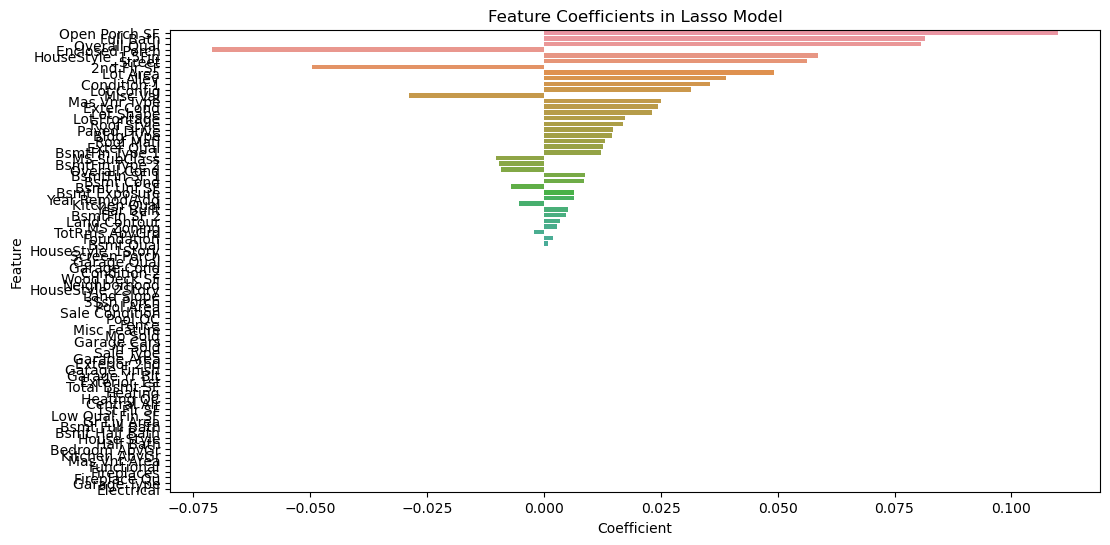

In [75]:
# Visualize all the columns and their coefficients sorted in descending order to understand the ones that has the most say in the SalePrice
# Hint - Check the code for Course 3 Module 1 - Linear regression in a predictive setting to 

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is your trained Lasso model
coefficients = model.named_steps['lasso'].coef_

# Create a dictionary with feature names and their coefficients
coef_dict = dict(zip(X.columns, coefficients))

# Convert the dictionary into a DataFrame
coef_df = pd.DataFrame(list(coef_dict.items()), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute values of coefficients
sorted_coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Visualize the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coef_df)
plt.title('Feature Coefficients in Lasso Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


*You can also use a built in variable importance function from decision trees to capture a summary of the importance of different features in our regression tree.* 

Note: There is no coding to be done in this cell. Just execute this cell and observe the feature importances.

In [76]:
# Assuming tree_model is your trained Decision Tree model
importances_dt = tree_model.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_df_dt = pd.DataFrame(list(zip(X_train.columns, importances_dt)),
                                         columns=['Feature', 'Importance'])
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(f"Feature importance by sklearn (Decision Tree): ")
feature_importance_df_dt.iloc[:20]


Feature importance by sklearn (Decision Tree): 


,Feature,Importance
0,Lot Area,0.674481
1,Overall Qual,0.127682
2,Condition 1,0.044861
3,Condition 2,0.027246
4,Lot Config,0.019862
5,Alley,0.008897
6,Lot Frontage,0.008445
7,Exter Cond,0.006877
8,Street,0.006717
9,Lot Shape,0.006402


In [86]:
import numpy as np

# Assuming y_train and y_valid are pandas Series
y_train = np.array(y_train).reshape(-1, 1)
y_valid = np.array(y_valid).reshape(-1, 1)


### 4.2
*What is the predictive performance of your models?*

In [90]:
# Check the shape of your datasets
print(f"Training set shape: {X_train_scaled.shape} {y_train.shape}")
print(f"Validation set shape: {X_valid_scaled.shape} {y_valid.shape}")

# Ensure the target variable has the same number of rows as the features
y_train = y_train[:X_train_scaled.shape[0]]
y_valid = y_valid[:X_valid_scaled.shape[0]]

# Check the shape again
print(f"Training set shape: {X_train_scaled.shape} {y_train.shape}")
print(f"Validation set shape: {X_valid_scaled.shape} {y_valid.shape}")


Training set shape: (2051, 273) (314, 1)
Validation set shape: (879, 273) (314, 1)
Training set shape: (2051, 273) (314, 1)
Validation set shape: (879, 273) (314, 1)


*Which model performs the best?*

...

### 4.3
*How reliable are your predictions?*

*A histogram of errors could also give a good insight on any underlying patterns*